In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Variance Gamma

In [2]:
errors = pd.read_csv("QMUL-Dissertation-2024/VG_Errors.csv",delimiter='\t')

In [3]:
errors[ (errors.K==100)& (errors.SET==1)]

,N,K,TruePrice,CM,FST,COS,SET
25,512,100.0,9.38375,9.13473,9.40718,9.36524,1
76,1024,100.0,9.38375,9.38159,9.38154,9.39505,1
127,2048,100.0,9.38375,9.38378,9.38350,9.38400,1
178,4096,100.0,9.38375,9.38378,9.38386,9.38385,1
229,8192,100.0,9.38375,9.38378,9.38381,9.38379,1


In [4]:
errors["CMerror"] = errors.TruePrice - errors.CM
errors["FSTerror"] = errors.TruePrice - errors.FST
errors["COSerror"] = errors.TruePrice - errors.COS

### Errors for $N = 1024$ Set I

In [5]:
sns.set_theme(style="whitegrid")

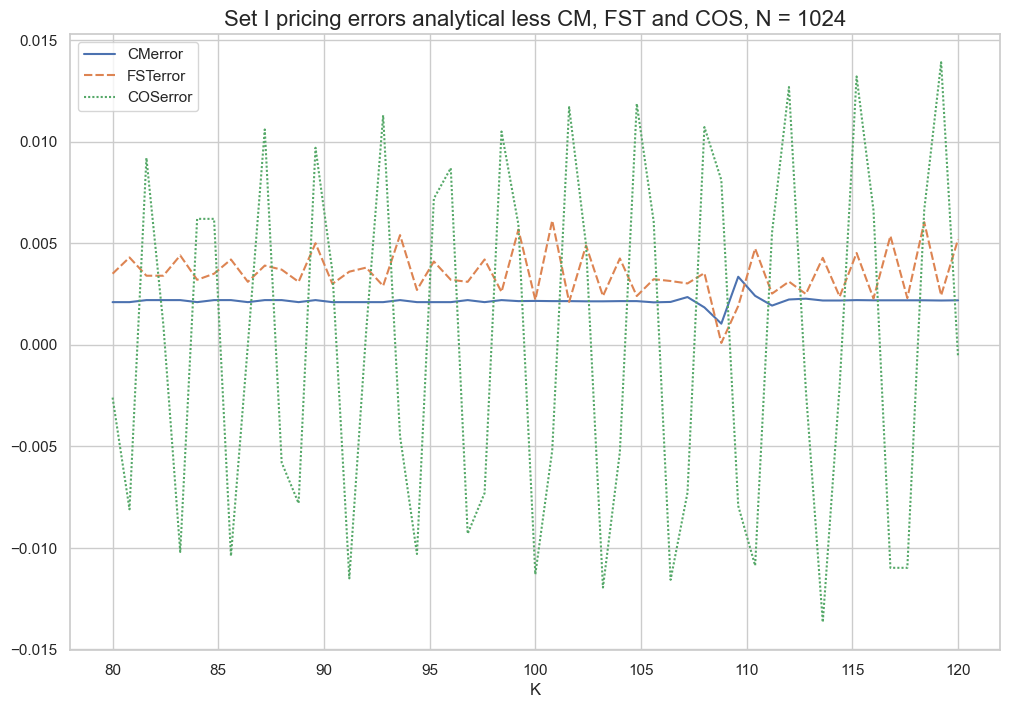

In [6]:
errors_set1_1024_df = errors[(errors.N==1024) & (errors.SET==1)].drop(columns=['N','SET'])
errors_set1_1024_df = errors_set1_1024_df.drop(columns=['TruePrice','CM', 'FST', 'COS'])

plt.figure(figsize=(12,8))
plt.title("Set I pricing errors analytical less CM, FST and COS, N = 1024",fontsize=16)
lineplot = sns.lineplot(errors_set1_1024_df.set_index('K'))
# plt.grid(True)
fig = lineplot.get_figure()
fig.savefig("VG1_1024")

### Errors for $N = 2048$ Set I

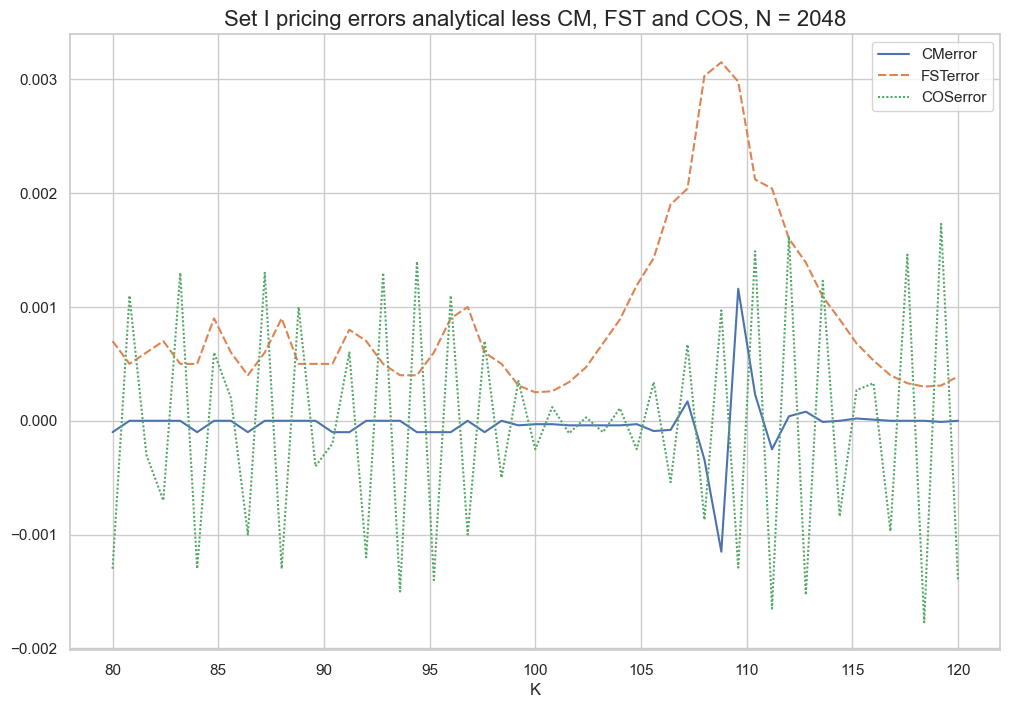

In [7]:
errors_set1_2048_df = errors[(errors.N==2048) & (errors.SET==1)].drop(columns=['N','SET'])

errors_set1_2048_df = errors_set1_2048_df.drop(columns=['TruePrice','CM', 'FST', 'COS'])

plt.figure(figsize=(12,8))
plt.title("Set I pricing errors analytical less CM, FST and COS, N = 2048",fontsize=16)
lineplot = sns.lineplot(errors_set1_2048_df.set_index('K'))
plt.grid(True)
fig = lineplot.get_figure()
fig.savefig("VG1_2048")

## Errors for $N=4096$ Set I

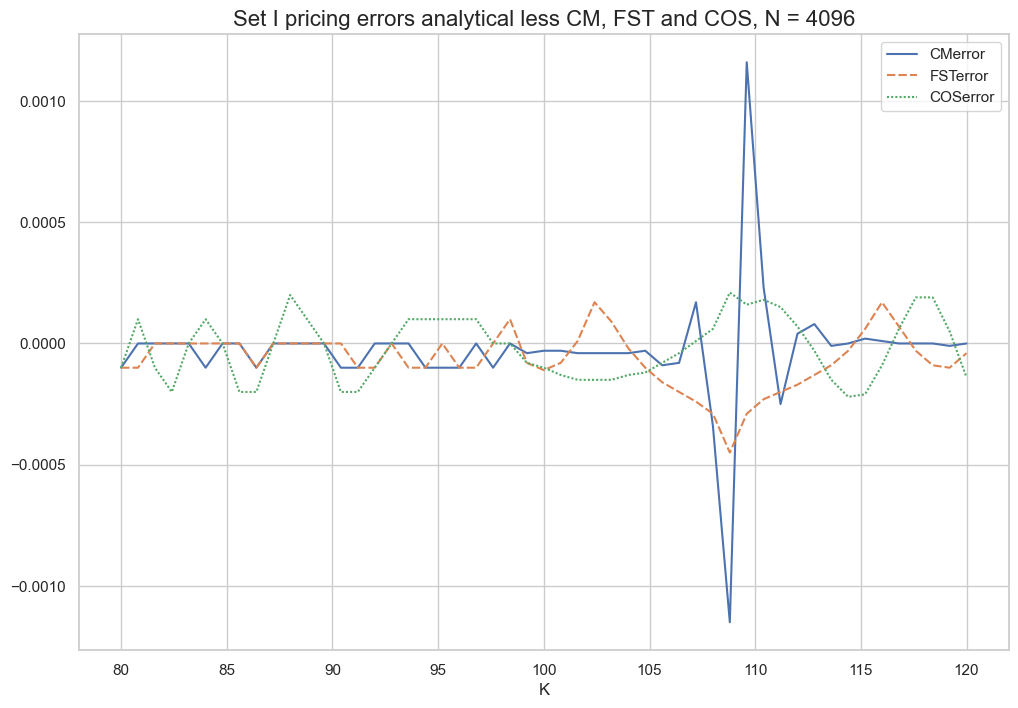

In [8]:
errors_set1_df = errors[(errors.N==4096) & (errors.SET==1)].drop(columns=['N','SET'])

errors_set1_df = errors_set1_df.drop(columns=['TruePrice','CM', 'FST', 'COS'])

plt.figure(figsize=(12,8))
plt.title("Set I pricing errors analytical less CM, FST and COS, N = 4096",fontsize=16)
lineplot = sns.lineplot(errors_set1_df.set_index('K'))
plt.grid(True)
fig = lineplot.get_figure()
fig.savefig("VG1_4096")

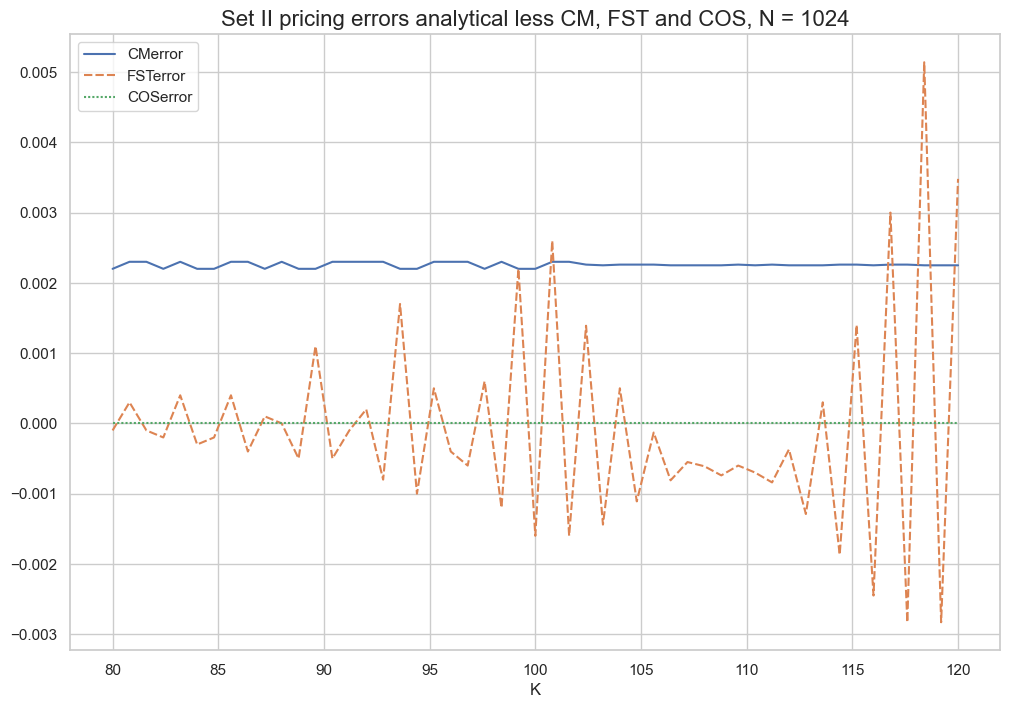

In [9]:
errors_set2_df = errors[(errors.N==1024) & (errors.SET==2)].drop(columns=['N','SET'])

errors_set2_df = errors_set2_df.drop(columns=['TruePrice','CM', 'FST', 'COS'])

plt.figure(figsize=(12,8))
plt.title("Set II pricing errors analytical less CM, FST and COS, N = 1024",fontsize=16)
lineplot = sns.lineplot(errors_set2_df.set_index('K'))
plt.grid(True)
fig = lineplot.get_figure()
fig.savefig("VG2_1024")

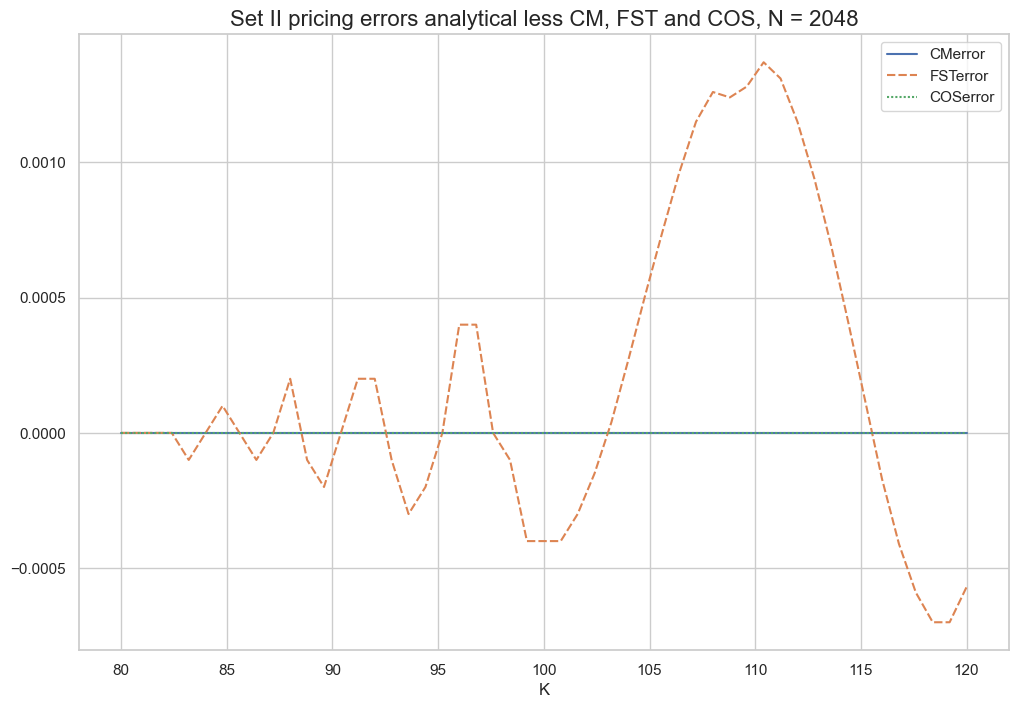

In [10]:
errors_set2_df = errors[(errors.N==2048) & (errors.SET==2)].drop(columns=['N','SET'])

errors_set2_df = errors_set2_df.drop(columns=['TruePrice','CM', 'FST', 'COS'])

plt.figure(figsize=(12,8))
plt.title("Set II pricing errors analytical less CM, FST and COS, N = 2048",fontsize=16)
lineplot = sns.lineplot(errors_set2_df.set_index('K'))
plt.grid(True)
fig = lineplot.get_figure()
fig.savefig("VG2_2048")

### Max errors

In [11]:
max_errors = errors.drop(columns=["TruePrice", "CM", "FST", "COS", "K"])

In [12]:
max_errors.abs().groupby(by=["SET","N"]).max()

CMerror  FSTerror  COSerror
SET N                                
1   512   0.25110   0.04218   0.11346
    1024  0.00335   0.00612   0.01391
    2048  0.00116   0.00315   0.00177
    4096  0.00116   0.00045   0.00022
    8192  0.00116   0.00010   0.00015
2   512   0.25940   0.02041   0.00001
    1024  0.00230   0.00514   0.00000
    2048  0.00000   0.00137   0.00000
    4096  0.00001   0.00033   0.00000
    8192  0.00001   0.00010   0.00000

### Time performance

In [13]:
min_time = pd.read_csv("QMUL-Dissertation-2024/VG_Time.csv", delimiter='\t')

In [14]:
min_time

,N,Analytical,CM,FST,COS,SET
0,512,2348,0.225,14,7,1
1,1024,2348,0.442,31,14,1
2,2048,2348,0.916,58,31,1
3,4096,2348,1.784,129,60,1
4,8192,2348,3.928,276,121,1
5,512,1474,0.220,15,7,2
6,1024,1474,0.458,29,15,2
7,2048,1474,0.950,63,31,2
8,4096,1474,1.969,136,63,2
9,8192,1474,3.836,295,128,2


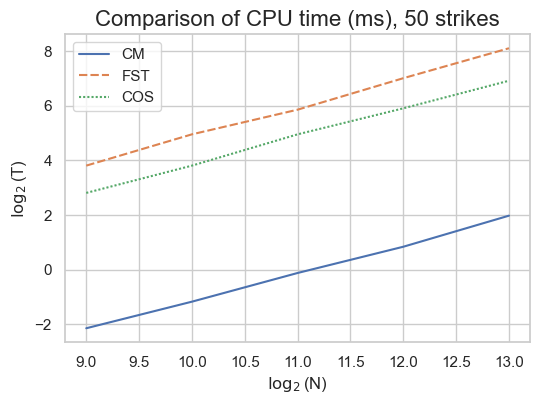

In [15]:
df = min_time[min_time.SET==1].drop(columns=['Analytical','SET'])
# df.N = df.N.apply(np.log2)
df = df.map(np.log2)
plt.figure(figsize=(6,4))
plt.title("Comparison of CPU time (ms), 50 strikes",fontsize=16)
lineplot = sns.lineplot(df.rename(columns={"N":"log2(N)"}).set_index('log2(N)'))
plt.xlabel(r"$\log_2$(N)")
plt.ylabel(r"$\log_2$(T)")
plt.grid(True)
fig = lineplot.get_figure()
fig.savefig("VG1time",bbox_inches='tight')
del df

# CGMY

In [10]:
errorsCGMY = pd.read_csv("QMUL-Dissertation-2024/CGMY_Errors.csv",delimiter='\t')

In [11]:
errorsCGMY["CMerror"] = errorsCGMY.TruePrice - errorsCGMY.CM
errorsCGMY["FSTerror"] = errorsCGMY.TruePrice - errorsCGMY.FST
errorsCGMY["COSerror"] = errorsCGMY.TruePrice - errorsCGMY.COS
errorsCGMY["MCFT1error"] = errorsCGMY.TruePrice - errorsCGMY.MCFT1
errorsCGMY["MCFT2error"] = errorsCGMY.TruePrice - errorsCGMY.MCFT2

### Errors for $N = 1024$ Set I

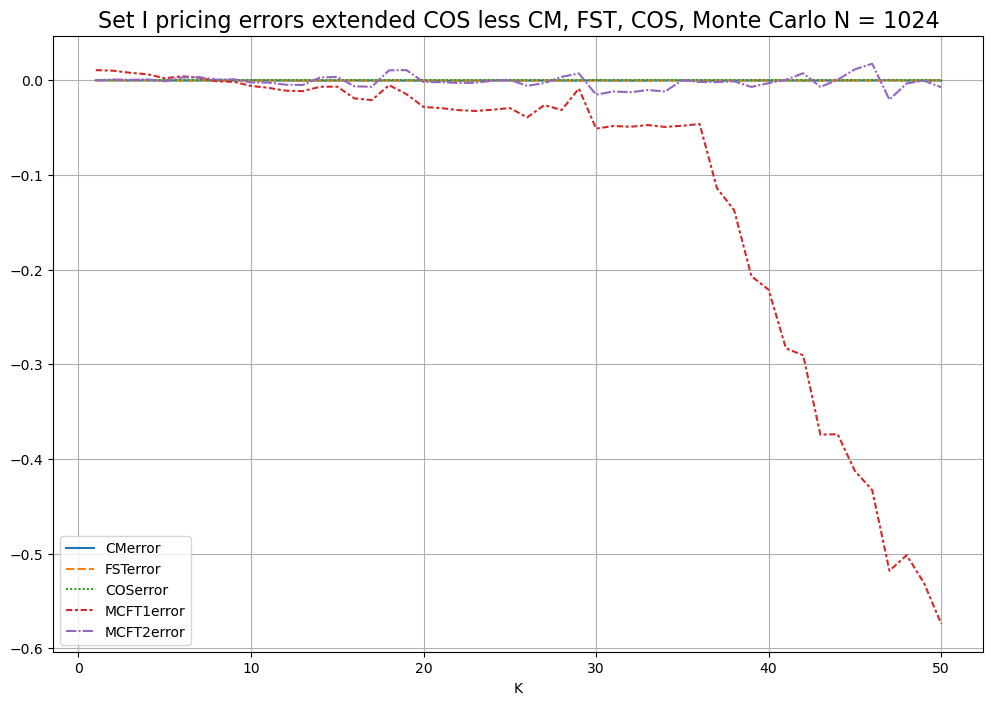

In [12]:
errors_df = errorsCGMY[(errorsCGMY.N==1024) & (errorsCGMY.SET==1)].drop(columns=['N','SET'])
errors_df = errors_df.drop(columns=['TruePrice','CM', 'FST', 'COS','MCFT1','MCFT2'])

plt.figure(figsize=(12,8))
plt.title("Set I pricing errors extended COS less CM, FST, COS, Monte Carlo N = 1024",fontsize=16)
lineplot = sns.lineplot(errors_df.set_index('K'))
plt.grid(True)
fig = lineplot.get_figure()
fig.savefig("CGMY1_1024")

### Errors for $N = 2048$ Set I

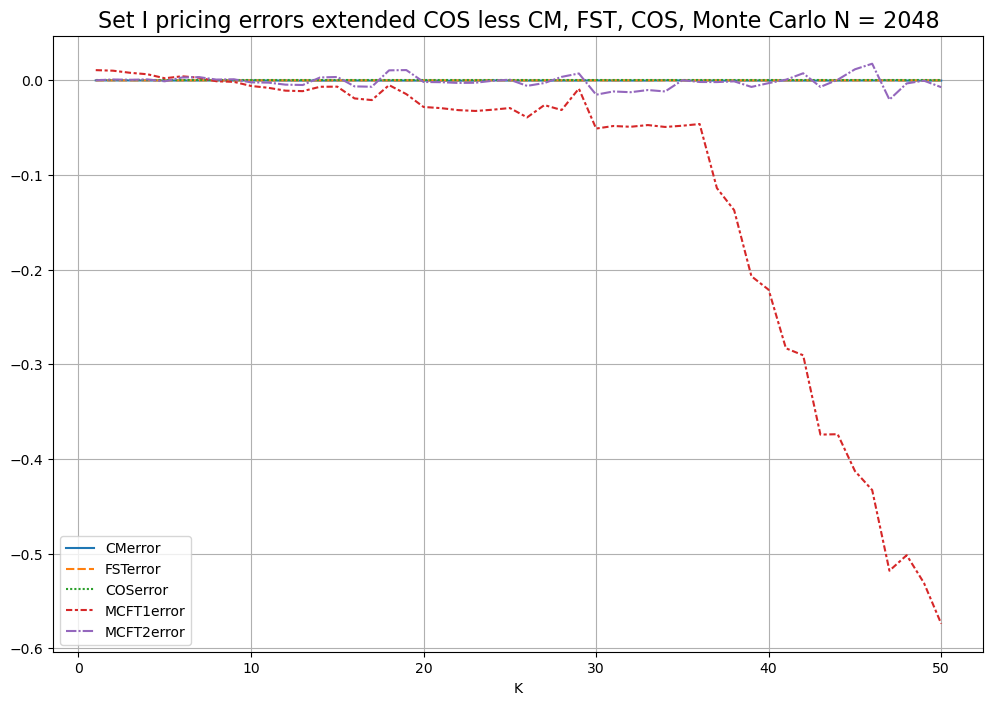

In [13]:
errors_set1_df = errorsCGMY[(errorsCGMY.N==8192) & (errorsCGMY.SET==1)].drop(columns=['N','SET'])
errors_set1_df = errors_set1_df.drop(columns=['TruePrice','CM', 'FST', 'COS','MCFT1','MCFT2'])

plt.figure(figsize=(12,8))
plt.title("Set I pricing errors extended COS less CM, FST, COS, Monte Carlo N = 2048", fontsize=16)
lineplot = sns.lineplot(errors_set1_df.set_index('K'))
plt.grid(True)
fig = lineplot.get_figure()
fig.savefig("CGMY1_2048",bbox_inches='tight')

### Errors for $N = 1024$ Set II

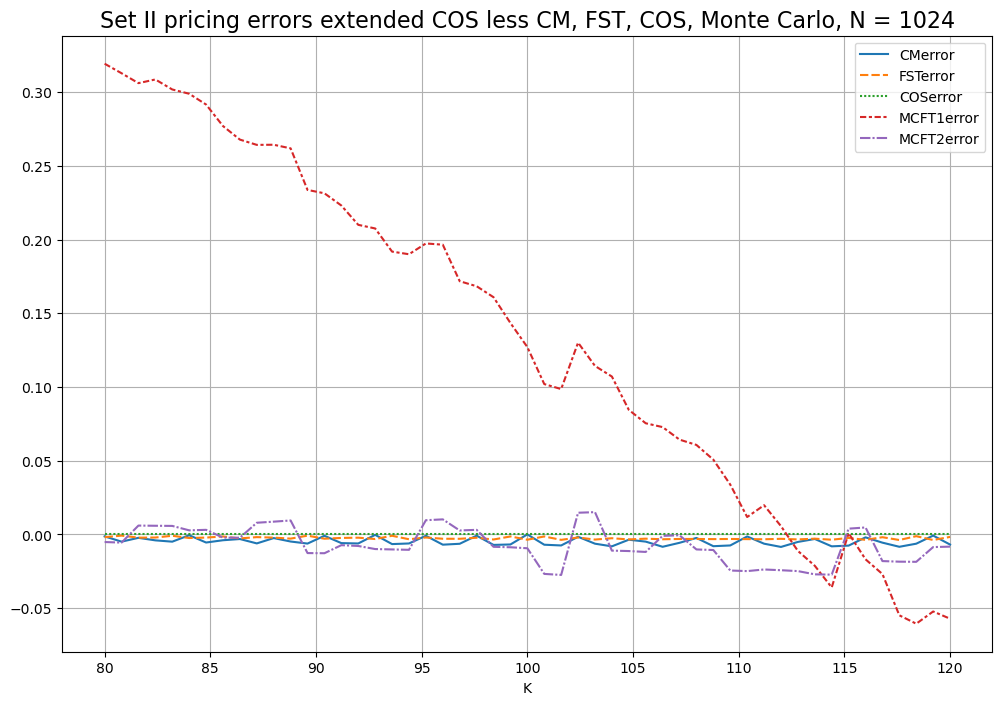

In [14]:
errors_df = errorsCGMY[(errorsCGMY.N==1024) & (errorsCGMY.SET==2)].drop(columns=['N','SET'])
errors_df = errors_df.drop(columns=['TruePrice','CM', 'FST', 'COS','MCFT1','MCFT2'])

plt.figure(figsize=(12,8))
plt.title("Set II pricing errors extended COS less CM, FST, COS, Monte Carlo, N = 1024",fontsize=16)
lineplot = sns.lineplot(errors_df.set_index('K'))
plt.grid(True)
fig = lineplot.get_figure()
fig.savefig("CGMY2_1024",bbox_inches='tight')

### Errors for $N = 2048$ Set II

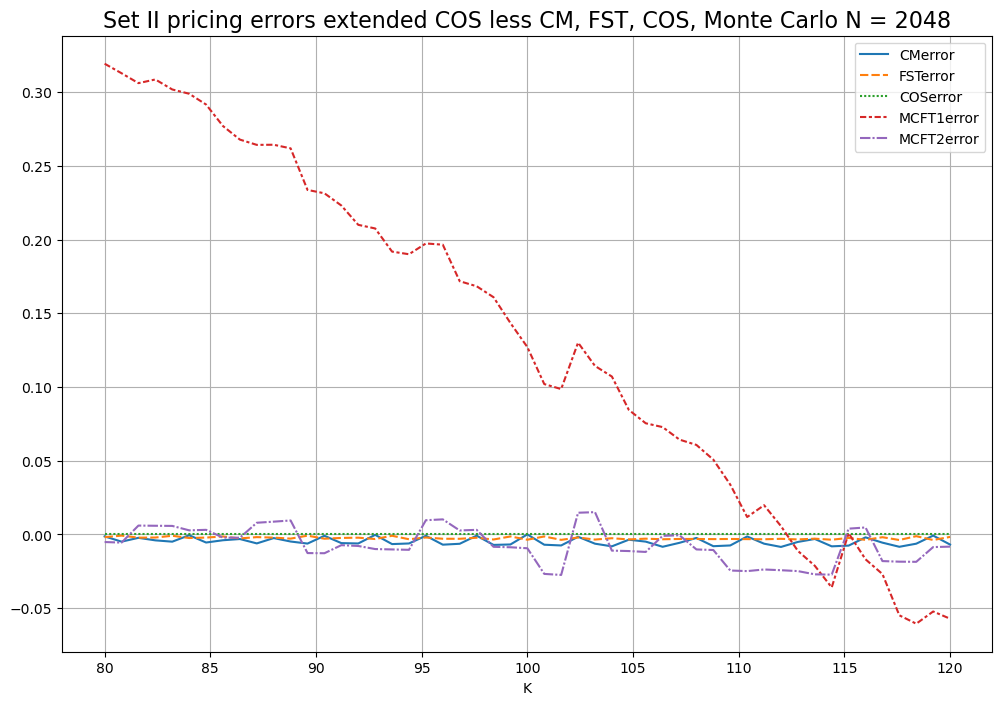

In [15]:
errors_df = errorsCGMY[(errorsCGMY.N==1024) & (errorsCGMY.SET==2)].drop(columns=['N','SET'])
errors_df = errors_df.drop(columns=['TruePrice','CM', 'FST', 'COS','MCFT1','MCFT2'])

plt.figure(figsize=(12,8))
plt.title("Set II pricing errors extended COS less CM, FST, COS, Monte Carlo N = 2048",fontsize=16)
lineplot = sns.lineplot(errors_df.set_index('K'))
plt.grid(True)
fig = lineplot.get_figure()
fig.savefig("CGMY2_2048",bbox_inches='tight')

### Errors for $N = 1024$ Set III

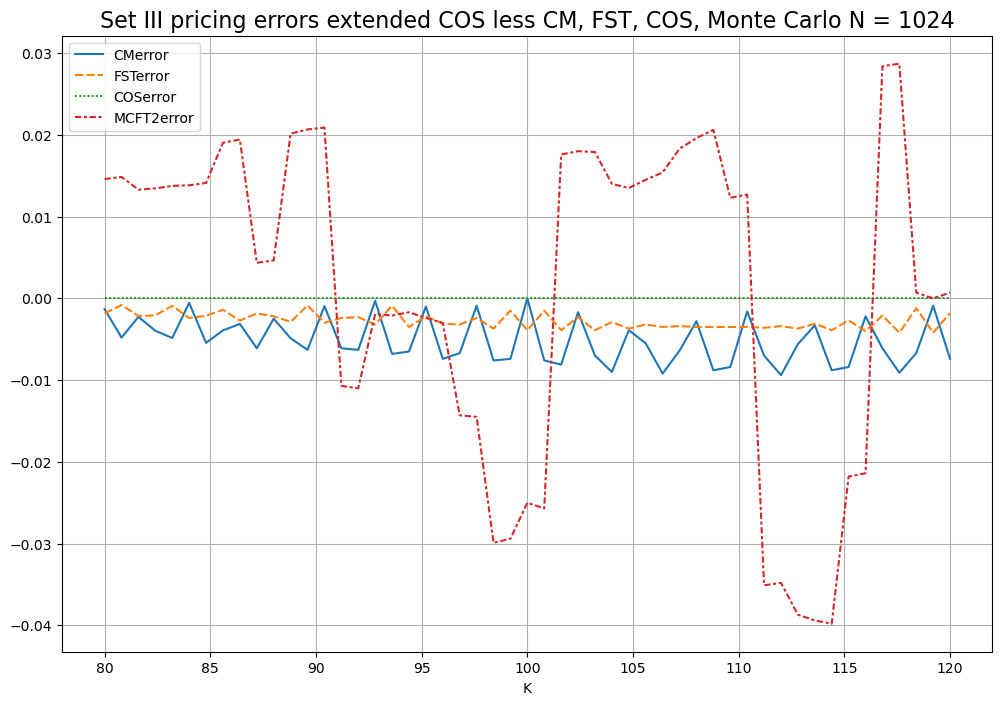

In [16]:
errors_df = errorsCGMY[(errorsCGMY.N==1024) & (errorsCGMY.SET==3)].drop(columns=['N','SET'])
errors_df = errors_df.drop(columns=['TruePrice','CM', 'FST', 'COS','MCFT1','MCFT2','MCFT1error'])

plt.figure(figsize=(12,8))
plt.title("Set III pricing errors extended COS less CM, FST, COS, Monte Carlo N = 1024",fontsize=16)
lineplot = sns.lineplot(errors_df.set_index('K'))
plt.grid(True)
fig = lineplot.get_figure()
fig.savefig("CGMY3_1024",bbox_inches='tight')

### Max errors

In [17]:
max_errors = errorsCGMY.drop(columns=["TruePrice", "CM", "FST", "COS", "MCFT1", "MCFT2", "K"])

In [18]:
max_errors.abs().groupby(by=["SET","N"]).max()
# df = max_errors.abs().groupby(by=["SET","N"]).max()
# df.sort_values(by=['N','SET'])

CMerror  FSTerror  COSerror  MCFT1error  MCFT2error
SET N                                                          
1   512   41.980618   0.00050       0.0     0.57400      0.0203
    1024   0.000300   0.00020       0.0     0.57400      0.0203
    2048   0.000300   0.00010       0.0     0.57400      0.0203
    4096   0.000300   0.00010       0.0     0.57400      0.0203
    8192   0.000300   0.00001       0.0     0.57400      0.0203
2   512    0.006200   0.01540       0.0     0.31934      0.0275
    1024   0.008500   0.00380       0.0     0.31934      0.0275
    2048   0.008500   0.00100       0.0     0.31934      0.0275
    4096   0.008500   0.00030       0.0     0.31934      0.0275
    8192   0.008500   0.00010       0.0     0.31934      0.0275
3   512    0.006400   0.01690       0.0     0.42739      0.0398
    1024   0.009400   0.00420       0.0     0.42739      0.0398
    2048   0.009400   0.00110       0.0     0.42739      0.0398
    4096   0.009400   0.00030       0.0     0.42739      0.0398
    8192   0.009400   0.00010       0.0     0.42739      0.0398

### Time performance

In [25]:
min_time = pd.read_csv("QMUL-Dissertation-2024/CGMY_Time.csv", delimiter='\t')

In [26]:
min_time

,N,COSextended,CM,FST,COS,MCFT1,MCFT2,SET
0,512,42050,0.417,19,12,13100,9150,1
1,1024,42050,0.828,39,25,13100,9150,1
2,2048,42050,1.727,79,49,13100,9150,1
3,4096,42050,3.460,160,98,13100,9150,1
4,8192,42050,7.014,330,197,13100,9150,1
5,512,66300,0.391,19,12,12200,8700,2
6,1024,66300,0.782,38,23,12200,8700,2
7,2048,66300,1.635,78,47,12200,8700,2
8,4096,66300,3.350,158,93,12200,8700,2
9,8192,66300,6.873,327,186,12200,8700,2


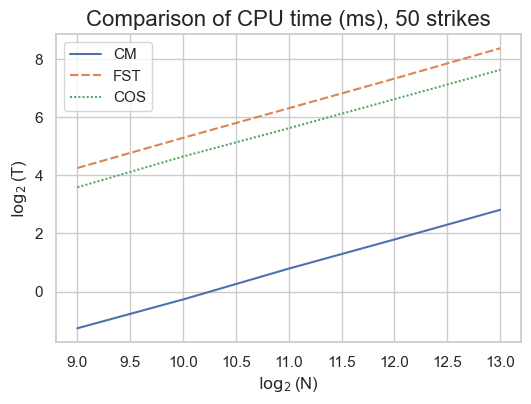

In [27]:
df = min_time[min_time.SET==1].drop(columns=['COSextended','SET','MCFT1', 'MCFT2'])
# df.N = df.N.apply(np.log2)
df = df.apply(np.log2)
plt.figure(figsize=(6,4))
plt.title("Comparison of CPU time (ms), 50 strikes",fontsize=16)
lineplot = sns.lineplot(df.rename(columns={"N":"log2(N)"}).set_index('log2(N)'))
plt.grid(True)
plt.xlabel(r"$\log_2$(N)")
plt.ylabel(r"$\log_2$(T)")
fig = lineplot.get_figure()
fig.savefig("CGMYtime",bbox_inches='tight')
df.columns
del df